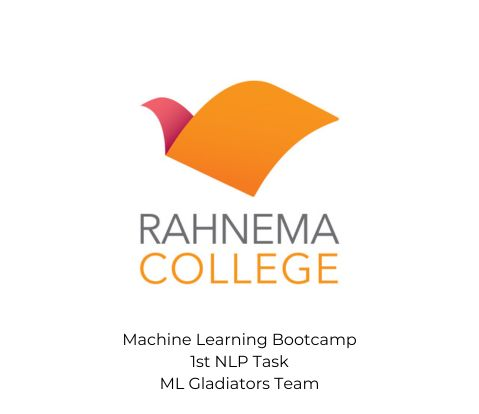

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#regular-expressions">Regular Expressions</a></li>
            <ol>
                <li><a href="#date-format">Date Format</a></li>
                <li><a href="#persian-abbreviation">Persian Abbreviation</a></li>
                <li><a href="#html-taggs">HTML Taggs</a></li>
                <li><a href="#json-detection">Json Detection</a></li>
            </ol>
        <li><a href="#tokenization">Tokenization</a></li>
            <ol>
                <li><a href="#wordpiece">WordPiece</a></li>
                <li><a href="#bpe">BPE</a></li>
                <li><a href="#sentencepiece">SentencePiece</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


<div id="regular-expressions">
    <h1>Regular Expressions</h1> 
</div>


<div id="date-format">
    <h2>Date Format</h2> 
</div>


<div dir="rtl">
سوال اول) <br>
برنامه‌ای بنویسی که با کمک عبارت منظم تمام فرمت‌های تاریخی را بیابد. 
</div>

<div dir="rtl">
فرمت‌های تاریخی: <br>
۱۴۰۳/۰۶/۲۵  <br>
۲۵/شهریور/۱۴۰۳ <br>
۱۴۰۳-۰۶-۰۵ <br>
بیست و پنجم شهریور ماه سال ۱۴۰۳ <br>
پانزدهم دی ماه سال ۱۴۰۳ <br>
یکم مرداد ماه سال ۱۳۲۶ <br>
</div>
</div>

<div dir="rtl">
در فانکشن زیر فرمت های مختلف روز شناسایی و استخراج می شوند. فرمت های عددی، حروف و ترکیب هردو در این فانکشن تعریف شده است.
</div>

In [170]:
import re

# Sample text
date_text = '''
۱۴۰۳/۰۶/۲۵
۲۵/شهریور/۱۴۰۳
۱۴۰۳-۰۶-۰۵
بیست و پنجم شهریور ماه سال ۱۴۰۳
پانزدهم دی ماه سال ۱۴۰۳
یکم مرداد ماه سال ۱۳۲۶
'''

def find_date_pattern(text):
    date_pattern = re.compile(r'''
    \b\d{4}[-/]\d{2}[-/]\d{2}\b |
    \b\d{1,2}/\w+/[\d]{4}\b |
    \b(?:سی(?:\s*|\u200c*)ام\s*|سی\s*و\s*(?:یکم)|سی\s*(?:یکم)|بیست\s*و\s*(?:یکم|دوم|سوم|چهارم|پنجم|ششم|هفتم|هشتم|نهم)|بیست\s*(?:یکم|دوم|سوم|چهارم|پنجم|ششم|هفتم|هشتم|نهم)|سیم|بیستم|نوزدهم|هجدهم|هفدهم|شانزدهم|پانزدهم|چهاردهم|سیزدهم|دوازدهم|یازدهم|دهم|نهم|هشتم|هفتم|ششم|پنجم|چهارم|سوم|دوم|یکم|)\s\w+\sماه\sسال\s\d{4}\b
    ''', re.VERBOSE | re.UNICODE)
    matches = date_pattern.findall(text)
    matches = [match.replace("\u200c", " ") for match in date_pattern.findall(text)]
    return matches

find_date_pattern(date_text)

['۱۴۰۳/۰۶/۲۵',
 '۲۵/شهریور/۱۴۰۳',
 '۱۴۰۳-۰۶-۰۵',
 'بیست و پنجم شهریور ماه سال ۱۴۰۳',
 'پانزدهم دی ماه سال ۱۴۰۳',
 'یکم مرداد ماه سال ۱۳۲۶']

<div id="persian-abbreviation">
    <h2>Persian Abbreviation</h2> 
</div>


<div dir="rtl">
سوال دوم) <br>
عبارت منظمی بنویسید که در متون فارسی تمام نشانه‌های اختصاری را بیابد. برخی از نشانه‌های اختصاری عبارتند از (ص)، (ره)، (ق.م)، (س)
</div>

<div dir="rtl">
در فانکشن زیر عبارات فارسی که داخل پرانتز هستند و بینشان فاصله وجود ندارد پیدا و استخراج می شوند. الگو طوری تعریف شده است که حروفی که به وسیله نقطه از هم جدا شده اند نیز به عنوان نشانه اختصاری استخراج
میکند.
همچنین  همانطور که در خروجی فانکشن مشخص شده است حروف انگلیسی و اعداد فارسی و انگیسی در این الگو قرار نمی گیرند.

</div>

In [173]:
import re

# Sample text
abb_text = '''
(عج)امام زمان
(ره) امام خمینی
(ص)حضرت محمد
(ق.م) قبل از میلاد مسیح
(س) حضرت فاطمه
(س.ج.ا.ا) سیمای جمهوری اسلامی ایران
کارخانجات چرخ خیاطی ایران (کاچیران)
(۱۴۰۳)
(همانطور که در کتب آمده است)
(1403)
(p.m)
'''

def find_abb_pattern(text):
    abbreviation_pattern = re.compile(r'''\(\s*[آ-ی.]+\s*\)''', re.VERBOSE)
    matches = abbreviation_pattern.findall(text)
    return matches

find_abb_pattern(abb_text)

['(عج)', '(ره)', '(ص)', '(س.ق.م)', '(س)', '(س.ج.ا.ا)', '(کاچیران)']

<div id="html-taggs">
    <h2>HTML Taggs</h2> 
</div>


<div dir="rtl">
سوال سوم) <br>
عبارت منظمی بنویسید که در سورس کدهای HTML، آی‌دی‌ها وکلاس‌های تمام تگ‌های HTML را استخراج کند.
</div>

<div dir="rtl">
باتوجه به اینکه کلاس ها و آیدی های تگ های html .بعد از = مشخص می شوند در این فانکشن الگویی طراحی شده که بعد از کلاس یا آیدی و علامت مساوری اسم کلاس و آیدی را استخراج می کند
</div>

In [113]:
import re

# Sample html code
html_code = '''
<div id="div1" class="container"></div>
<span id="1dhs" class="highlight"></span>
<p class="text-muted"></p>
<a href="#" class="btn btn-primary"></a>
'''

def get_class_id(html_code):
    pattern = re.compile(r'(?:id|class)\s*=\s*["\']([^"\']+)["\']')
    matches = pattern.findall(html_code)
    return matches

get_class_id(html_code)

['div1', 'container', '1dhs', 'highlight', 'text-muted', 'btn btn-primary']

<div id="json-detection">
    <h2>Json Detection</h2> 
</div>


<div dir="rtl">
سوال چهارم) <br>
عبارت منظمی بنویسید که بتواند JSONها را تشخیص دهد.
</div>

<div dir="rtl">
json ها به عنوان مثال به فرمت
'{"name":"John", "age":30, "car":null}'
هستند و برای شناسایی و برای تشخیص آنها از الگوی زیر استفاده شده است.
</div>

In [177]:
import re

# Sample Json
json_text = '''
{
    "name": "sara",
    "age": 22,
    "isStudent": false,
    "courses": ["Math", "Science"],
    "address": {
        "street": "128 Main St",
        "city": "London "
    },
    "nullValue": null
}
{"key": "value", "number": 123, "boolean": true}
just some text
{yes alright}
'''

def find_json(text):
    pattern = re.compile(r'\{\s*(?:(?:"[^"]*"\s*:\s*(?:\d+|"[^"]*"|true|false|null|\[.*?\]|\{.*?\}))\s*,?\s*)+\}', re.DOTALL)
    matches = pattern.findall(text)
    return matches

find_json(json_text)

['{\n    "name": "sara",\n    "age": 22,\n    "isStudent": false,\n    "courses": ["Math", "Science"],\n    "address": {\n        "street": "128 Main St",\n        "city": "London "\n    },\n    "nullValue": null\n}',
 '{"key": "value", "number": 123, "boolean": true}']

<div id="tokenization">
    <h1>Tokenization</h1> 
</div>


<div id="wordpiece">
    <h2>WordPiece</h2> 
</div>


<div dir="rtl">
الگوریتم WordPiece با تقسیم کلمات به کاراکترهای جداگانه و اضافه کردن "##" در ابتدای هر کلمه شروع می شود تا نشان دهد که بخشی از یک کلمه بزرگتر است. سپس واژگانی از subwordها  بر اساس مجموعه آموزشی ایجاد می کند. در طول این فرایند WordPiece کلمات را به واحدهای زیر کلمه تجزیه می کند و به آنها شناسه های منحصر به فرد اختصاص می دهد. این فرآیند کمک می‌کند تا هم جزئیات شخصیت‌ها و هم بافت کلمات بزرگ‌تر را به تصویر بکشد.
</div>

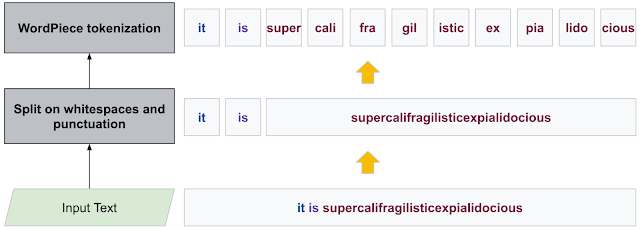

In [178]:
corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

In [180]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\SnappFood\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SnappFood\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

C:\Users\SnappFood\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [181]:
from collections import defaultdict

word_freqs = defaultdict(int)
for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1

print(word_freqs)

defaultdict(<class 'int'>, {'This': 3, 'is': 2, 'the': 1, 'Hugging': 1, 'Face': 1, 'Course': 1, '.': 4, 'chapter': 1, 'about': 1, 'tokenization': 1, 'section': 1, 'shows': 1, 'several': 1, 'tokenizer': 1, 'algorithms': 1, 'Hopefully': 1, ',': 1, 'you': 1, 'will': 1, 'be': 1, 'able': 1, 'to': 1, 'understand': 1, 'how': 1, 'they': 1, 'are': 1, 'trained': 1, 'and': 1, 'generate': 1, 'tokens': 1})


In [182]:
alphabet = []
for word in word_freqs.keys():
    if word[0] not in alphabet:
        alphabet.append(word[0])
    for letter in word[1:]:
        if f"##{letter}" not in alphabet:
            alphabet.append(f"##{letter}")

alphabet.sort()
alphabet

print(alphabet)

['##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y']


In [183]:
vocab = ["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"] + alphabet.copy()
print(vocab)

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y']


<div dir="rtl">
در ابتدا الگوریتم،  دیتا متن را برای پردازش و یادگیری  کلمات دریافت و سپس علاوه بر استفاده از توکن‌های خاص مثل SEP و CLS و UNK، کلمات را به کاراکترهای منفرد و ابتدایی تبدیل میکند. 
الگوریتم با پیمایش متن توکن گذاری شده، به شمارش تعداد تکرارهای جفت کاراکترهای اولیه میپردازد. سپس آن جفت کاراکترهایی که بیشترین فراوانی را دارند انتخاب میکند و به عنوان توکن واحد درنظر میگیرد برای مثال اگر حرف e و s در کنار هم زیاد دیده شده باشد es  را بعنوان یک توکن واحد درنظر میگیرد.
این پروسه‌ی ادغام به بروزرسانی لیست توکن‌ها و شمارش تا جایی که دیگر هیچ جفتی قابل ترکیب نباشند و یا به اندازه‌ی واژگان (vocab size) از قبل تعیین شده توسط ما برسد، ادامه میدهد. نتیجه‌ی این فرایند تولید subword‌ها و ریشه‌ی بامعنی کلمات یا بخش جزئی کلمات است که تمرکز این ادغام برروی حداکثر کردن احتمال داده آموزشی (likelihood) با توجه به واژگان خواهد بود. در این الگوریتم برای اینکه نشان دهد که subword‌ها از تکراری از توکن‌های قبلی است از ##‌ استفاده میکند. (w ##o ##r ##d).
</div>

In [184]:
splits = {
    word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
    for word in word_freqs.keys()
}

In [185]:
def compute_pair_scores(splits):
    letter_freqs = defaultdict(int)
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            letter_freqs[split[0]] += freq
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            letter_freqs[split[i]] += freq
            pair_freqs[pair] += freq
        letter_freqs[split[-1]] += freq

    scores = {
        pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
        for pair, freq in pair_freqs.items()
    }
    return scores

In [186]:
pair_scores = compute_pair_scores(splits)
for i, key in enumerate(pair_scores.keys()):
    print(f"{key}: {pair_scores[key]}")
    if i >= 5:
        break

('T', '##h'): 0.125
('##h', '##i'): 0.03409090909090909
('##i', '##s'): 0.02727272727272727
('i', '##s'): 0.1
('t', '##h'): 0.03571428571428571
('##h', '##e'): 0.011904761904761904


In [187]:
best_pair = ""
max_score = None
for pair, score in pair_scores.items():
    if max_score is None or max_score < score:
        best_pair = pair
        max_score = score

print(best_pair, max_score)

('a', '##b') 0.2


In [188]:
vocab.append("ab")

In [189]:
def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue
        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                merge = a + b[2:] if b.startswith("##") else a + b
                split = split[:i] + [merge] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

In [190]:
splits = merge_pair("a", "##b", splits)
splits["about"]

['ab', '##o', '##u', '##t']

<div dir="rtl">
فرمول در نظر گرفته شده در این الگوریتم برای اختصاص امتیاز به هر جفت کاراکتر به این صورت محاسبه می‌شود:
</div>

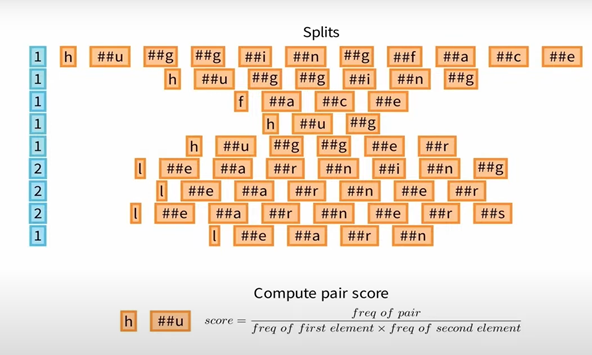

<div dir="rtl">
حال با داشتن جدول واژگان جدید ساخته شده از مرحله قبل، به توکن گذاری کلمات ورودی میپردازیم ان هم به این صورت که در هر کلمه به دنبال طولانی ترین پیشوندی که در جدول واژگان مرحله‌ی قبل میگردد. اگر کلمه بطور کامل یافت شد،همان گونه استفاده خواهد شد. اگر نه، بدنبال طولانی ترین پسوند میگردد. اگر بازهم یافت نشد، به شکستن کلمه انقدر ادامه میدهد که نهایتا به کاراکترها برسد.
</div>

In [191]:
vocab_size = 70
while len(vocab) < vocab_size:
    scores = compute_pair_scores(splits)
    best_pair, max_score = "", None
    for pair, score in scores.items():
        if max_score is None or max_score < score:
            best_pair = pair
            max_score = score
    splits = merge_pair(*best_pair, splits)
    new_token = (
        best_pair[0] + best_pair[1][2:]
        if best_pair[1].startswith("##")
        else best_pair[0] + best_pair[1]
    )
    vocab.append(new_token)
print(vocab)

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y', 'ab', '##fu', 'Fa', 'Fac', '##ct', '##ful', '##full', '##fully', 'Th', 'ch', '##hm', 'cha', 'chap', 'chapt', '##thm', 'Hu', 'Hug', 'Hugg', 'sh', 'th', 'is', '##thms', '##za', '##zat', '##ut']


<div dir="rtl">
فاکتور vocab_size توسط ما تعیین میشود و به این معناست که مدل تا چه میزانی به تولید واژگان بپردازد. هر چه این عدد بزرگتر باشد منجر به تنوع بیشتر در تولید واژگان و درنتیجه عملکرد بهتر مدل خواهد شد اما هزینه‌اش استفاده بیشتر از حافظه و پیچیدگی بیشتر مدل است.
</div>

<div dir="rtl">
مثال:

</div>

In [192]:
def encode_word(word):
    tokens = []
    while len(word) > 0:
        i = len(word)
        while i > 0 and word[:i] not in vocab:
            i -= 1
        if i == 0:
            return ["[UNK]"]
        tokens.append(word[:i])
        word = word[i:]
        if len(word) > 0:
            word = f"##{word}"
    return tokens

In [193]:
def tokenize(text):
    pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    encoded_words = [encode_word(word) for word in pre_tokenized_text]
    return sum(encoded_words, [])

In [194]:
print(tokenize("This is the Hugging Face course!"))

['Th', '##i', '##s', 'is', 'th', '##e', 'Hugg', '##i', '##n', '##g', 'Fac', '##e', 'c', '##o', '##u', '##r', '##s', '##e', '[UNK]']


<div dir="rtl">
<li>مدل های زبانی که ازword piece  استفاده می کنند عبارتند از:</li>
BERT, ALBERT, RoBERTa, XLNet, Electra, T5 (Text-to-Text Transfer Transformer) <br>
    <br>
<li>کتابخانه هایی که از word piece استفاده میکنند:</li>
Hugging Face Tansformers, TensorFlow, AllenNLP, OpenNMT <br>
</div>

<div dir="rtl">
<b>نقاط قوت:</b>
    
<li>کاهش کلمات Out-Of-Vocabulary (OOV)</li>	<br>
مثال‌هایی از کلمات OOV که چالشی هستند برای مدل‌های NLP و با کمک الگوریتم word piece‌ به واحدهای کوچکتر شکسته میشوند:

</div>

Rare Names: <br>
OOV Word: "Kardashian" <br>
Subword Tokens: ["Kar", "dash", "ian"] <br>
Technical Terms: <br>
OOV Word: "Neuroplasticity" <br>
Subword Tokens: ["Neuro", "plastic", "ity"] <br>
Newly Coined Terms/Slang <br>
OOV Word: "Flexitarian" <br>
Subword Tokens: ["Flex", "itarian"] <br>
Foreign Words: <br>
OOV Word: "Schadenfreude" (German) <br>
Subword Tokens: ["Schaden", "freude"] <br>
Compound Words: <br>
OOV Word: "Hippopotomonstrosesquippedaliophobia" (fear of long words) <br>
Subword Tokens: ["Hippo", "potam", "on", "monstro", "sesqui", "pedal", "i", "ophobia"] <br>
Hyphenated Words: <br>
OOV Word: "User-friendly" <br>
Subword Tokens: ["User", "-", "friendly"] <br>
Brand Names: <br>
OOV Word: "Glockenspiel" <br>
Subword Tokens: ["Glock", "en", "spiel"] <br>

<div dir="rtl">
<li>بهبود فهم معنایی:</li>	
حفظ معنای اصلی کلمات و فهم ساختارهای زبانی پیچیده‌تر
<li>سازگاری با زبان‌های مختلف:</li>
مخصوصا برای زبان‌هایی مثل زبان ترکی که از نوع چسبنده هستند و کلمات زیادی از چسباندن زیرکلمات به هم دارند
<li>تعامل خوب با مدل‌های ترنسفورمر</li>

</div>

<div dir="rtl">
<b>نقاط ضعف:</b>
<li>طولانی شدن توکن‌ها</li>	
<li>پیچیدگی توکن گذاری</li>
<li>نیاز به اموزش با داده‌ی بزرگ و متنوع</li>
<li>تضمینی برای بازگشت به کلمات کامل مخصوصا از نظر معنایی مورد نظر نیست</li>
</div>

<div dir="rtl">
<b>تفاوت اصلی با مدل BPE: </b> <br>
از نظر اینکه این دو روش کلمات را به کاراکتر های اولیه تبدیل و سپس به ادغام کردن آنها براساس تکرار و فراوانی میپردازند شباهت دارند اما فرق اصلی این دو روش در روش محاسبه‌ی امتیازی است که به هر جفت کاراکتر انتخاب شده اختصاص میدهند است. به این صورت که BPE هرجفت کاراکتری که زیاد تکرار شده باشد را انتخاب میکند اما  word piece آن جفت کاراکتری را انتخاب میکند که علاوه بر فراوانی، شباهتش با داده اموزش را ماکسیمم می‌کند. این تفاوت در انتخاب جفت‌ها این قابلیت را به word piece میدهد که بتواند واژگانی با دقت و کارایی بالاتر نسبت به BPE‌ تولید کند و ساده و سریع بودن BPE میتواند باعث بروز چالش‌هایی در زمینه درک معنا و مفاهیم شخصی سازی شده شود.
</div>

<div id="bpe">
    <h2>BPE</h2> 
</div>


<div dir="rtl">
در ابتدا این مدل برای فشرده‌سازی متن پیشنهاد شد اما امروزه از ان بعنوان الگوریتم خوبی برای تسک‌های پردازش زبان استفاده میشود. ایده‌ی اصلی این الگوریتم تقسیم کردن کلمات به واحدهای کوچکتری که با فراوانی بیشتر در متن اصلی هستند، میباشد. <br>
بعد از دریافت متن اصلی برای اموزش الگوریتم، به نرمالایز کردن و همچنین پیش پردازش‌های اولیه که درنهایت به لیستی از کلمات میرسیم. و سپس میتوان تعداد تکرار کلمات را شمرد. بعد کلمات را حرف به حرف جدا کرده و حروف الفبای استفاده شده در متن را استخراج میکنیم. ‌این کاراکترهای بدست امده، واژگان ابتدایی الگوریتم هستند که به تدریج بزرگتر میشوند آن هم به این صورت که به شمارش هر جفت کاراکتری که کنار هم هستند میپردازد و تکرار هر جفت کاراکتر را محاسبه میکند. و آن جفت کاراکتری را که بیشترین تکرار را داشت انتخاب و به لیست واژگان اضافه میکند و همچنین جایگزین حروف الفبای جدا از هم میکند و این حلقه دوباره با جفت کاراکتر جدید تکرار میشود تا به لیستی از واژگان با طول دلخواهی برسیم. <br>
این الگوریتم در مواردی که سرعت و سادگی اهمیت دارد، به‌ویژه در برنامه‌های نسبتاً ساده‌تر که تفکیک‌پذیری و فهم معنایی حیاتی نیست، ترجیح داده میشود. ولی پیچیدگی کمتری نسبت به word Piece‌ دارد چون فقط فراوانی زا محاسبه میکند اما word piece احتمال شباهت را باید محاسبه کند و هزینه‌ی بیشتری دارد. <br>
از word piece‌ در مواردی که روابط معنایی و جزئیات زبانی احتیاج است استفاده میشود <br>
</div>

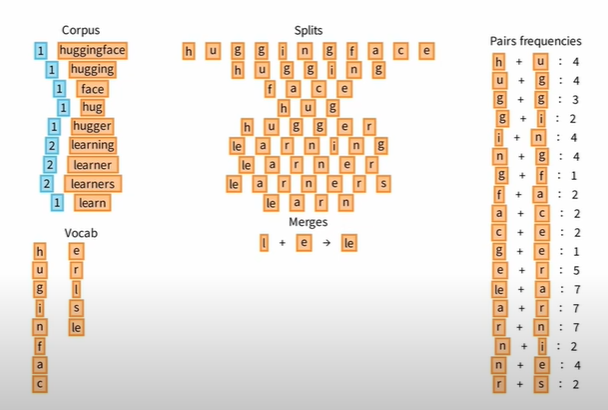

<div dir="rtl">
این الگوریتم در مواردی که سرعت و سادگی اهمیت دارد، به‌ویژه در برنامه‌های نسبتاً ساده‌تر که تفکیک‌پذیری و فهم معنایی حیاتی نیست، ترجیح داده میشود. ولی پیچیدگی کمتری نسبت به word Piece‌ دارد چون فقط فراوانی زا محاسبه میکند اما word piece احتمال شباهت را باید محاسبه کند و هزینه‌ی بیشتری دارد. <br>
از word piece‌ در مواردی که روابط معنایی و جزئیات زبانی احتیاج است استفاده میشود <br>
مثال:
</div>

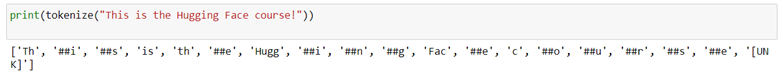

<div dir="rtl">
مدل های زبانی که ازBPE استفاده می کنند عبارتند از: <br>
GPT-2, GPT-3, BERT, DistilBERT, RoBERTa, XLNet, Machine Translation Model, T5 (Text-to-Text Transfer Transformer) <br>
کتابخانه هایی که ازBPE استفاده میکنند:<br>
Hugging Face Tansformers, Sentence Piece, Fairseq, OpenNMT <br>
</div>

<div dir="rtl">
<b> نقاط قوت: <br> </b>
<li>کاهش کلمات Out-Of-Vocabulary (OOV)</li>
<li>انعطاف در اندازه‌ی واژگان</li>
<li>نشان دادن تغییرات مورفولوژیکی:</li>
اشکال مختلف مورفولوژیکی یک کلمه ("plays", "playing", "played") را از طریق اجزای subword مشترک به تصویر میکشد، بنابراین نمایش بهتری از زبان را ارائه می‌کند
<li>سادگی و سرعت</li>
<li>قابلیت مدیریت کلمات مرکب و چسبیده</li>
</div>

<div dir="rtl">
<b>نقاط ضعف:<br> </b>
<li>کاهش اطلاعات معنایی متن</li>
<li>متغیر بودن طول توکن‌ها:</li>
توالی حاصل از توکن‌ها می‌تواند به‌طور قابل توجهی در طول متفاوت باشد، که منجر به توالی‌های طولانی‌تر از مدل‌هایی که از توکن‌گذاری مبتنی بر کلمات استفاده می‌کنند، می‌شود.
<li>وابسته بودن به داده اموزشی</li>
<li>تعمیم دهی محدود</li>
<li>بایاس فراوانی:</li>
تقسیم کلمات به جفت‌های پرتکرار، باعث تبدیل آنها به واژگانی که شهودی نیستند میشود و مشکلاتی در نادیده گرفته شدن جزئیات زبانی به همراه خواهد داشت.
</div>

<div id="sentencepiece">
    <h2>SentencePiece</h2> 
</div>


<div dir="rtl">
در این بخش به معرفی SentencePiece می‌پردازیم که یک توکنایزر و دیتوکنایزر متن بدون نظارت و مستقل از زبان است. این روش برای سیستم‌های تولید متن مبتنی بر شبکه‌های عصبی طراحی شده است، جایی که اندازه‌ی واژگان قبل از آموزش مدل عصبی تعیین می‌شود. به طور کلی، SentencePiece دو الگوریتم تقسیم‌بندی زیرواژه، Byte-Pair Encoding (BPE) و Unigram Language Model (ULM) را با قابلیت آموزش مستقیم از جملات خام پیاده‌سازی می‌کند. این روش امکان ساخت یک سیستم کاملاً end-to-end را فراهم می‌کند که به هیچ‌گونه پردازش وابسته به زبان متکی نیست. 
</div>

<div dir="rtl">
برخلاف توکنایزرهای سنتی که به قوانین پیش‌توکنایز خاص زبان‌ها متکی هستند (مانند جدا کردن متن با فاصله‌ها یا علامت‌های نگارشی)، SentencePiece متن ورودی را به عنوان یک دنباله‌ی بایتی خام در نظر می‌گیرد. این ویژگی آن را به‌ویژه برای زبان‌هایی که از فاصله استفاده نمی‌کنند (مثل ژاپنی یا چینی) مفید می‌کند و باعث می‌شود در طیف وسیعی از زبان‌ها عملکرد خوبی داشته باشد.
</div>

<div dir="rtl">
SentencePiece از چهار بخش اصلی تشکیل شده است: Normalizer، Trainer، Encoder و Decoder. Normalizer یک ماژول برای نرمال‌سازی کاراکترهای یونیکد معادل معنایی به فرم‌های استاندارد است. Trainer مدل تقسیم‌بندی زیرواژه را از مجموعه داده نرمال‌سازی شده آموزش می‌دهد. در این روش، نوع مدل زیرواژه را به عنوان پارامتر Trainer مشخص می‌کنیم. Encoder به‌صورت داخلی نرمالایزر را اجرا می‌کند تا متن ورودی را نرمال‌سازی کرده و آن را با استفاده از مدل زیرواژه‌ای که توسط Trainer آموزش داده شده است، به یک دنباله زیرواژه تبدیل کند. Decoder دنباله‌ی زیرواژه را به متن نرمال‌سازی شده تبدیل می‌کند.
</div>


<div dir="rtl">
<b> ویژگی‌ها: </b> <br>
<b>مزایا:</b> <br>
<li> Lossless Tokenization:</li> دی‌توکنایز کردن به معنای فرآیند بازگرداندن شناسه‌های توکن کدگذاری‌شده به متن اصلی است. SentencePiece توکنایز کردن بدون از دست دادن اطلاعات را اجرا می‌کند، به طوری که تمامی اطلاعات مورد نیاز برای بازتولید متن نرمال‌شده در خروجی انکودر حفظ می‌شود. به عبارت دیگر، نتیجه‌ی detokenize(tokenize('text')) == 'text' خواهد بود.  متن خام و توالی توکن‌ها در روش‌های قبلی مانند WordPiece معمولاً به صورت برگشت‌پذیر قابل تبدیل نیستند (یعنی detokenize(tokenize('text')) != 'text'). این به خصوص به دلیل ابهام در اطلاعات مربوط به فاصله‌گذاری‌ها است. توکنایزرهای مبتنی بر زیرواژه‌ها ابتدا متن را به بخش‌های کلمه‌ای تقسیم می‌کنند و اطلاعات فاصله‌گذاری در این فرآیند نادیده گرفته می‌شود. برای مثال، توالی توکن‌های ["New", "York", "."] ممکن است از هر یک از "New York."، "NewYork."، یا حتی "New York ." تولید شده باشد.  دی‌توکنایز کردن اغلب به هورستیک‌های خاص زبان نیاز دارد زیرا زبان‌های مختلف قوانین منحصربه‌فردی برای مرزهای کلمات و نقطه‌گذاری‌ها دارند. پیوستن بخش‌های کلمه‌ای با فاصله‌گذاری ممکن است به عنوان یک قانون منطقی به نظر برسد، اما در زبان‌هایی مانند چینی یا ژاپنی هیچ فاصله‌ای بین کلمات وجود ندارد. در چنین مواردی، یک الگوریتم پیچیده برای تقسیم کلمات و یک هورستیک پیوستن باید برای هر زبان پیاده‌سازی شود. SentencePiece توکنایز کردن بدون از دست دادن اطلاعات و زبان‌ناشناخت را با ساده‌سازی ارائه می‌دهد؛ به این صورت که متن ورودی به عنوان یک توالی از کاراکترهای یونیکد، شامل فاصله‌گذاری‌ها، در نظر گرفته می‌شود و از یک طرح کدگذاری و دیکدینگ یکسان استفاده می‌شود که تمامی اطلاعات لازم برای بازتولید متن اصلی را حفظ می‌کند. به طور خاص، SentencePiece ابتدا فاصله‌گذاری‌ها را با یک نماد متا به نام "_" جایگزین می‌کند و سپس الگوریتم‌های زیرتوکنایز کردن مانند BPE، یونیگرام، و WordPiece را اعمال می‌کند.
<br> 
<li>fast Subword Training and Segmentation:</li> این روش به کمک زبان C++ پیاده سازی‌شده است و در نتیجه، از تکنیک‌های تسریع برای هر دو مرحله‌ی آموزش و قطعه‌بندی استفاده می‌کند، که به آن امکان می‌دهد با حجم زیادی از داده‌های خام بدون پیش‌توکن‌سازی کار کند.  در واقع برای قطعه‌بندی BPE، از الگوریتمی با پیچیدگی O(N log(N)) استفاده می‌کند که در آن نمادهای ترکیب‌شده توسط یک heap دوتایی (صف اولویت) مدیریت می‌شوند. همچنین، برای مدل زبان یونیگرام، پیچیدگی‌های آموزش و قطعه‌بندی به صورت خطی نسبت به اندازه‌ی داده‌های ورودی است.
<br> 
<li>On-the-fly Processing:</li> این روش می‌تواند توکنایز کردن و دی‌توکنایز کردن متن را در به طور دینامیک در حین آموزش یا Infrence مدل‌های NMT انجام دهد. 
<br> 
<li>whitespace agnostic:</li> در زبان‌های مختلف به خوبی کار می‌کند، به‌ویژه زبان‌هایی که از فاصله استفاده نمی‌کنند، مانند زبان ژاپنی و چینی.
<br>
<li>با استفاده از واحدهای زیرواژه، SentencePiece می‌تواند به‌طور مؤثری کلمات نادر را مدیریت کند و مشکل کلمات خارج از واژگان (OOV) را کاهش دهد.</li>
<li>Subword Regularization:</li>
در این روش الگوریتم Subword Regularization پیاده‌سازی می‌شود. هدف این الگوریتم چه است؟
</div>

<div dir="rtl">
مسئله‌ی Neural Machine Translation (NMT) را در نظر بگیرید. فرض کنید جمله‌ی ورودی X و جمله‌ی هدف Y باشد. هدف محاسبه‌ی P(Y|X) است و از آنجایی که هر دو‌ی X و Y از دنباله‌ای از زیر‌واژه‌ها تشکیل شده‌اند، مقدار مورد نظر را بر حسب پارامتر‌های مدل می‌توانیم به کمک فرمول زیر محاسبه کنیم:
</div>

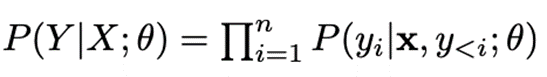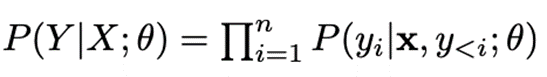

<div dir="rtl">
با این حال، واضح است که عبارت فوق کاملاً صحیح نیست. دلیل آن است که در واقعیت،‌ X و Y می‌توانند با دنباله‌های ممکن زیادی از زیرواژه‌ها ساخته شوند. برای مثال، کلمه Hello را می‌توان به فرم‌های مختلفی از توکن‌های زیر نشان داد:
</div>

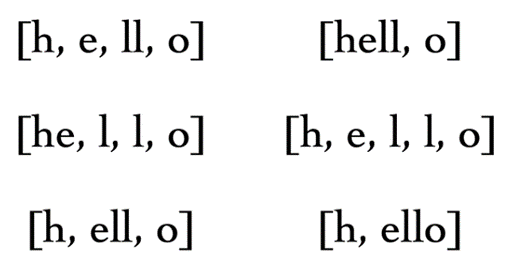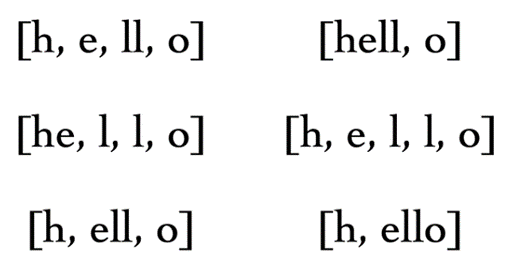

<div dir="rtl">
پس در واقعیت، در فرمول ذکر شده، باید X و Y را با نمایشی مشخص‌ از توکن‌ها جایگذاری کنیم. SentencePiece این مشکل را برطرف خواهد کرد. در نهایت، با رفع مشکل، NMT به کمک روش تخمین بیشترین درست‌نمایی آموزش داده می‌شود. در واقع می‌توان نشان داد که مجموعه پارامتر‌ها را باید به گونه‌ای بهینه کنیم که تابع درست‌نمایی حاشیه‌ای ماکسیمم شود:
</div>

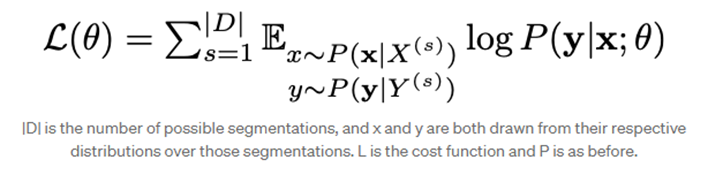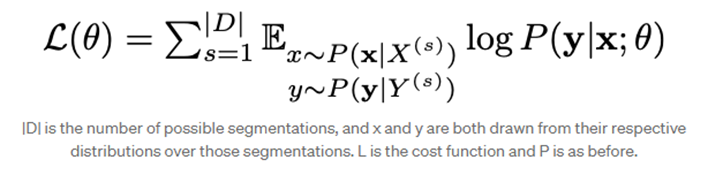

<div dir="rtl">
کاری که در واقع در عمل باید انجام شود، حذف E[…] و جایگذاری x , y با یک تقسیم‌بندی تصادفی است. باقی موارد در آموزش مدل NMT دست نخورده باقی می‌ماند.
</div>

<div dir="rtl">
حال قبل از اینکه ادامه دهیم، مدل زبانی Unigram را معرفی می‌کنیم. UML یک مدل احتمالاتی است که هدف آن تعیین محتمل‌ترین تقسیم‌بندی یک متن به توکن‌ها است. این مدل بر این فرض استوار است که متن ورودی توسط دنباله‌ای از توکن‌های مستقل از یک واژگان مشخص تولید می‌شود. مدل با یک واژگان بزرگ اولیه که شامل بسیاری از زیرواژه‌های ممکن است شروع می‌شود. این واژگان معمولاً شامل هر دنباله کاراکتری ممکن در داده‌های آموزشی است. سپس، برای هر نمونه آموزشی (دنباله‌ی متن)، احتمال هر تقسیم‌بندی ممکن به توکن‌ها محاسبه می‌شود. در واقع، احتمال یک تقسیم‌بندی خاص به صورت حاصلضرب احتمالات توکن‌های منفرد محاسبه می‌شود.
</div>

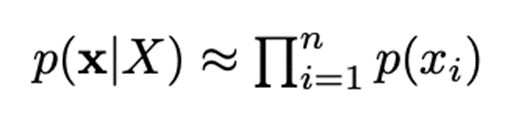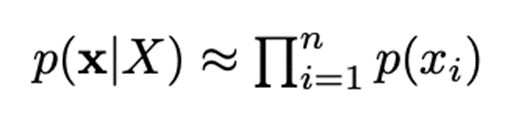

<div dir="rtl">
در نهایت، هدف این است که بیشترین احتمال را برای کل داده‌های آموزشی نسبت به مدل بدست آوریم. برای این منظور، مدل به‌صورت تکراری واژگان را کاهش می‌دهد؛ به این صورت که توکن‌هایی که کمترین مشارکت را در احتمال کلی داده‌ها دارند، حذف می‌شوند و این فرایند تا زمانی که اندازه واژگان به حد مشخصی برسد ادامه می‌یابد.
</div>

<div dir="rtl">
حال که مدل‌های زبانی Unigram آشنا شدیم، باید ذکر کنیم که SentencePiece می‌تواند بر روی هر مدل Unigram ساخته شود. تنها چیزهایی که باید به آن ارائه کنیم عبارتند از:
</div>

<div dir="rtl">
<li> احتمالات Unigram</li>
<li> مجموعه داده آموزشی </li>
سپس، فقط SentencePiece tokenizer را بر روی مجموعه داده آموزش می‌دهیم و می‌توانیم آموزش NMT با تنظیم‌سازی زیرواژه (یا بدون آن) را انجام دهیم.
حال فرض کنید که از یک مدل زبانی Unigram مثل BPE استفاده کردیم و مجموعه‌ای از احتمالات Unigram را داریم. برای آموزش، ما می‌خواهیم که احتمال لگاریتمی یک توکنایزیشن مشخص مانند X = (x_1, …, x_n) را به کمک احتمالات Unigram که در واقع P(x_1) , … , P(x_n) را ماکسیمایز کنیم. از آنجایی که تنها X که توکنایز نشده است را داریم و بخش‌بندی آن به توکن‌های x_1, … , x_n مشاهده نشده است، باید از الگوریتم Expectation Maximization (EM)  استفاده کنیم. در واقع هدف ماکسیمایز کردن عبارت زیر است:
</div>

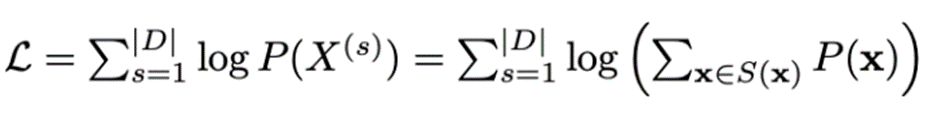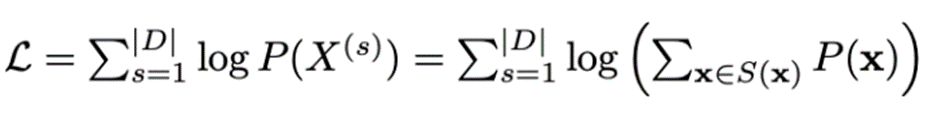

<div dir="rtl">
در عبارت فوق، x در واقع دنباله‌ی Unigramها است و s(x) نمایانگر مجموعه دنباله‌های ممکن است. همانطور که گفتیم، ما در اینجا فقط عبارت توکنایز نشده را مشاهده کردیم و لذا باید از الگوریتم EM بهره ببریم. برای این منظور، گام‌های حل مسئله عبارت است از:
</div>

<div dir="rtl">

<li>تعیین احتمالات Unigram . همانطور که قبل‌تر هم اشاره کردیم، از آنجایی که P(x) = P(x_1). … . P(x_n)، پس زمانی که Unigram ها را داشته باشیم،‌ احتمال هر دنباله قابل محاسبه است.</li>
<li>گام M: محاسبه بیشترین احتمال در بین دنباله‌ها به کمک گام قبل. در نتیجه، یک توکنایزیشن یکتا به دست می‌آوریم.</li>
<li>گام E: به کمک توکنایزیشن به دست آمده در گام قبل، با محاسبه‌ی رخداد هر زیرواژه در توکنایزیشن، احتمالات Unigram را دوباره محاسبه می‌کنیم.</li>
<li>گام دو و سه را آنقدری ادامه می‌دهیم که به جواب بهینه برسیم.</li>
</div>

<div dir="rtl">
<li>مدل‌های زبانی که از این روش استفاده می‌کنند:</li>
-	مدل‌های زبانی: ALBERT – XLNet – Marian – T5
</div>

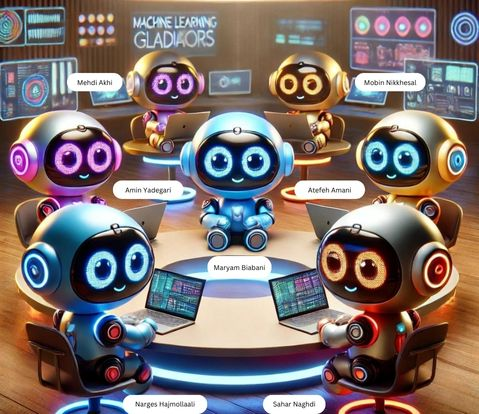

<h3 align="center"> By ML Gladiators Team <h3/>